In [588]:
from IPython.display import HTML
from IPython.display import Image

In [ ]:
#<img src='WCMS_home_image.png' width="640" height="540" align="center"/>

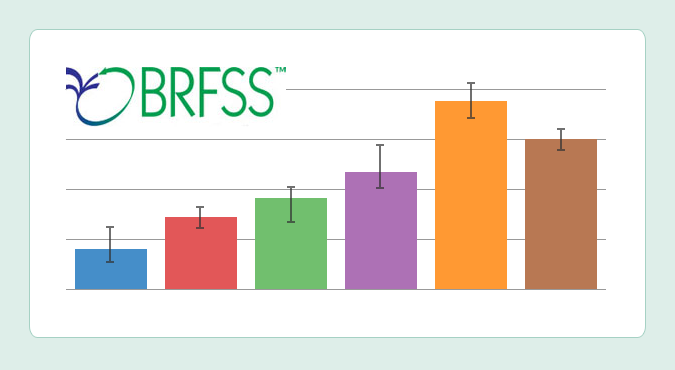

In [589]:
Image("WCMS_home_image.png")

Portfolio Project: Survey Data Analysis Using Python
===================

**By: Pieter Leffers**,

*Starting Date: May 1, 2018*

*Completion Date: May 25, 2018*

*Last Updated: May 25, 2018*

Project Description
-----------------

For this project I wanted to combine skills I had used previously working for the State of Oregon with skills I have been trying to use and increase. Specifically I wanted to use Python to analyze public health survey data in order to answer a specific project question or set of questions; bonus points if I can use Machine Learning techniques as well. It stands to reason that the Behavioral Risk Factor Surveillance System would be an excellent candidate for this project since I already have a fair amount of content knowledge expertise from when I was a Research Analyst of chronic disease. 

Prompted by a question I never truly got the opportunity to explore working for The State: <U><b>What factors influence inadequate sleep, or lack of sleep?</b></U> *Does smoking cigarettes influence sleep? Does Alcohol use? How about weight and old age?*
 
After starting the project I was able to find a pamphlet titled:  <a href="https://www.cdc.gov/sleep/pdf/states508/FS_ShortSleepByState_GA_508tagged.pdf">Sleep and Health Among Adults in Georgia</a> where the CDC explored relationships between inadequate sleep and chronic disease. This was a good resource as this publication kind of had everything I was looking to explore. However, the results were based on the 2014 BRFSS survey so it is possible that my 2016 results may not entirely support their conclusions; a risk you run with data analysis on self-reported data when comparing different years.

**The Challenges**
- Lack of python documentation for proper Survey Techniques
- Lack of examples to reference where Python was the language of choice for Survey Analysis 
- Lack of support or documentation for various weighting systems
- Lack of documentation or just terrible documentation for the Statsmodels package
- Getting Python results to match SAS results

**Materials**
- Python 3.6
- SAS 9.2

Data Source:
-----------
**The Behavioral Risk Factor Surveillance System**, available at: https://www.cdc.gov/brfss/annual_data/annual_data.htm

The Behavioral Risk Factor Surveillance System (BRFSS) is a cross-sectional telephone survey that state health departments conducts monthly over landline telephones and cellular telephones with a standardized questionnaire and technical and methodologic assistance from CDC. BRFSS is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. 

The 2016 BRFSS data continues to reflect survey changes made in 2011 in the weighting methodology (raking) as well as the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2016 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico. 

There are 486,303 records for 2016.

*An important feature when analyzing BRFSS data is the weighting system in order to produce accurate statistical results. Below is an introductory summary of Raked Weighting which is provided in the proceding link.*

**Raked Weighting:**

When data are used without weights, each record counts the same as any other record and this implies the following assumptions:

   1. Each record has equal probabilities of being selected.
   2. Noncoverage and nonresponse are equal among all segments of the population.  
   
During data collection, the conditions that actually happen may be different than the preceding 
assumptions, and the differences can become large enough to affect the results of the data set. Weighting each record appropriately can help to adjust for these differences (or assumption violations). Another reason for weighting one that is conceptually unrelated to the first reason is to make the total number of cases equal to some desired number. This state BRFSS data is the number of people in the state who are aged 18 years and older. In the BRFSS, such raking serves as a blanket adjustment for noncoverage and nonresponse and forces the total number of cases to equal population estimates for each geographic region. 

*Weighting Formula:* https://www.cdc.gov/brfss/annual_data/2016/pdf/weighting_the-data_webpage_content.pdf

*For the time being these links work:*

*Codebook:*
https://www.cdc.gov/brfss/annual_data/2016/pdf/codebook16_llcp.pdf

*Calculated Variables:* https://www.cdc.gov/brfss/annual_data/2016/pdf/2016_calculated_variables_version4.pdf 

*Additional Materials:* https://www.cdc.gov/sleep/pdf/states508/FS_ShortSleepByState_GA_508tagged.pdf



*Downey, Allen B.,Think Stats: Exploratory Data Analysis,O'Reilly Media, Inc., 2014
http://greenteapress.com/thinkstats2/thinkstats2.pdf*

In [590]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [591]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
from pandas.core import datetools
import pandas.tseries 
import statsmodels.stats.weightstats as smf
#Turn off annoying warnings
import warnings
warnings.filterwarnings(action='ignore')

In [592]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/data/'
BRFSS2016=pd.read_csv(location+'2016/BRFSS2016.csv',low_memory=False)

In [593]:
BRFSS2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486303 entries, 0 to 486302
Columns: 276 entries, _STATE to sleeptime
dtypes: float64(226), int64(49), object(1)
memory usage: 1.0+ GB


In [594]:
BRFSS2016.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3,sleeptime
count,486303.000000,486303.000000,4.863030e+05,486303.000000,486303.000000,486303.000000,486303.000000,4.863030e+05,4.863030e+05,253013.0,...,102386.000000,151855.000000,234791.000000,230141.000000,234791.000000,111013.000000,213798.000000,231156.000000,453321.000000,486303.000000
mean,28.973366,6.756479,6.886909e+06,6.738184,14.670964,2016.028758,1113.388978,2.016007e+09,2.016007e+09,1.0,...,1.197693,2.130684,1.904264,1.326513,1.830803,1.975039,1.996010,1.289463,1.975375,0.778465
std,15.959411,3.342713,3.371982e+06,3.370312,8.325667,0.167125,34.053420,6.915870e+03,6.915870e+03,0.0,...,0.398261,2.067062,0.294230,0.468938,0.374927,0.156007,0.063038,0.453514,1.493921,1.009916
min,1.000000,1.000000,1.012017e+06,1.000000,1.000000,2016.000000,1100.000000,2.016000e+09,2.016000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15.000000,4.000000,4.112016e+06,4.000000,8.000000,2016.000000,1100.000000,2.016002e+09,2.016002e+09,1.0,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,27.000000,7.000000,7.112016e+06,7.000000,14.000000,2016.000000,1100.000000,2.016005e+09,2.016005e+09,1.0,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,40.000000,10.000000,1.004202e+07,10.000000,21.000000,2016.000000,1100.000000,2.016009e+09,2.016009e+09,1.0,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,78.000000,12.000000,1.231202e+07,12.000000,31.000000,2017.000000,1200.000000,2.016037e+09,2.016037e+09,1.0,...,2.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,9.000000


The first 5 rows of the dataset:

In [595]:
BRFSS2016.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3,sleeptime
0,1,1,1072016,1,7,2016,1100,2016000001,2016000001,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,1,1,1112016,1,11,2016,1100,2016000002,2016000002,1.0,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,2.0,0
2,1,1,1062016,1,6,2016,1100,2016000003,2016000003,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
3,1,1,1082016,1,8,2016,1100,2016000004,2016000004,1.0,...,NaN,1.0,2.0,1.0,2.0,NaN,2.0,1.0,9.0,1
4,1,1,1052016,1,5,2016,1100,2016000005,2016000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0


In order to produce accurate results I will need to use some or all of the weighting techniques shown below:

Weighting Variable

In [383]:
WeightVar=BRFSS2016['_LLCPWT']
WeightVar.head()

0     767.844566
1     329.659884
2     290.749306
3     211.039206
4    1582.539830
Name: _LLCPWT, dtype: float64

Clustering Variable

In [384]:
ClusterVar=BRFSS2016['_PSU']
ClusterVar.head()

0    2016000001
1    2016000002
2    2016000003
3    2016000004
4    2016000005
Name: _PSU, dtype: int64

Stratum

In [481]:
StrataVar=BRFSS2016['_STSTR']
StrataVar.head()

0    11011
1    11011
2    11011
3    11011
4    11011
Name: _STSTR, dtype: int64

Using Statsmodels I was able to mostly reproduce the results from SAS code, which was my reference point; but unfortunately I was unable to accurately reproduce the Standard Errors provided by SAS. I don't believe this to be a major issue for producing frequency tables or summary statistics, but it is worth keeping in mind for regression analysis. 

**Sleep**

In [386]:
#np.dtype(BRFSS2016['sleeptime'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['sleeptime'])
#one-hot encoding
for x in temp.sleeptime.unique():
    temp[x]=(temp.sleeptime==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'sleeptime':'sleepTime', 0:'zero', 1:'one', 9:'nine'}, inplace=True)   

In [387]:
 #Setup Statsmodels to get Frequency Weights
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([zero,one,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
zeroth,first,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={zeroth: 'Fewer than 7 hrs',first: '7 or more hrs',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
sleepTable=freq_table #Saving frequncy table for later
print('Self-Reported: Average number of hours of sleep in a 24-hour period.')
freq_table

Self-Reported: Average number of hours of sleep in a 24-hour period.


,Percent,Frequency,Weight_freq
Fewer than 7 hrs,34.294376,153525.0,8.715955e+07
7 or more hrs,64.680450,327054.0,1.643861e+08
Not Sure/Refused,1.025174,5724.0,2.605491e+06
Total,100.000000,486303.0,2.541511e+08


In [388]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(228,100,90)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 1 out of 3 adults in the United States <br> report getting 6 hours or less sleep per night.',
                yaxis=dict(title='Sleep in a 24-hour period</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


**Physical Activity**

In [389]:
#np.dtype(BRFSS2016['_TOTINDA'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_TOTINDA'])
#one-hot encoding
for x in temp._TOTINDA.unique():
    temp[x]=(temp._TOTINDA==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'_TOTINDA':'physActive', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [390]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'Had physical activity or exercise',second: 'No physical activity or exercise',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
physactTable=freq_table
print('CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.')
freq_table

CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.


,Percent,Frequency,Weight_freq
Had physical activity or exercise,75.481018,361649.0,1.918359e+08
No physical activity or exercise,24.383464,123860.0,6.197085e+07
Not Sure/Refused,0.135519,794.0,3.444223e+05
Total,100.000000,486303.0,2.541511e+08


In [391]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)','rgb(252,213,180)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 1 out of 4 U.S. adults <br> report not getting physical activity outside their job.',
                yaxis=dict(title='Physical Activity (%) in 30 days</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Children**

In [392]:
#np.dtype(BRFSS2016['_CHLDCNT'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_CHLDCNT'])
#one-hot encoding
for x in temp._CHLDCNT.unique():
    temp[x]=(temp._CHLDCNT==x).astype(int)

#temp.columns
#Index(['_CHLDCNT', 4, 1, 2, 5, 3, 9, 6], dtype='object')
temp.rename(columns={'_CHLDCNT':'ChildCount', 4:'four', 1:'one', 2:'two', 5:'five',3:'three',9:'nine',6:'six'}, inplace=True)

In [393]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,fifth,sixth,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4],freq_table.index[5],freq_table.index[6]
freq_table.rename(index={first: 'One child',second: 'Two children',third: 'Three children',fourth:'Four children',fifth:'Five children',sixth:'Six children',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={7:'Total'},inplace=True)
print('Self-Reported: Number of children in the household.')
freq_table

Self-Reported: Number of children in the household.


,Percent,Frequency,Weight_freq
One child,63.119989,359007.0,1.604202e+08
Two children,14.625321,51115.0,3.717042e+07
Three children,12.571689,43194.0,3.195109e+07
Four children,5.454542,18358.0,1.386278e+07
Five children,1.947746,6735.0,4.950218e+06
Six children,0.978397,3472.0,2.486606e+06
Not Sure/Refused,1.302316,4422.0,3.309852e+06
Total,100.000000,486303.0,2.541511e+08


In [394]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:6]['index'],
               y=graphData.loc[0:6]['Percent'],
               text=round((graphData.loc[0:6]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(158,202,225)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately 3 out of 5 U.S. adults <br> report having one child in the household.',
                yaxis=dict(title='Number of Children (%) ',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Age Groupings**

In [395]:
#BRFSS2016['_AGEG5YR'].unique()
#array([ 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype=int64)

#np.dtype(BRFSS2016['_AGEG5YR'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_AGEG5YR'])
#one-hot encoding
for x in temp._AGEG5YR.unique():
    temp[x]=(temp._AGEG5YR==x).astype(int)
    
#temp.columns
#Index(['_AGEG5YR', 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype='object')
temp.rename(columns={'_AGEG5YR':'AgeGroupings', 5:'five', 8:'eight', 13:'thirteen', 11:'eleven',1:'one',10:'ten',12:'twelve',9:'nine',7:'seven',4:'four',3:'three',2:'two',6:'six',14:'fourteen'}, inplace=True)

In [396]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eight
freqTemp = smf.DescrStatsW(temp['eight'], weights=WeightVar)
counts=np.array(pd.Series(temp.eight).value_counts())
eight=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#ten
freqTemp = smf.DescrStatsW(temp['ten'], weights=WeightVar)
counts=np.array(pd.Series(temp.ten).value_counts())
ten=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eleven
freqTemp = smf.DescrStatsW(temp['eleven'], weights=WeightVar)
counts=np.array(pd.Series(temp.eleven).value_counts())
eleven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#twelve
freqTemp = smf.DescrStatsW(temp['twelve'], weights=WeightVar)
counts=np.array(pd.Series(temp.twelve).value_counts())
twelve=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#thirteen
freqTemp = smf.DescrStatsW(temp['thirteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.thirteen).value_counts())
thirteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#fourteen
freqTemp = smf.DescrStatsW(temp['fourteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.fourteen).value_counts())
fourteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,seven,eight,\
nine,ten,eleven,twelve,thirteen,fourteen]),columns=['Percent','Frequency','Weight_freq'])

#Modify index rows
first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth,thirteenth,fourteenth = \
freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],\
freq_table.index[4],freq_table.index[5],freq_table.index[6],freq_table.index[7],\
freq_table.index[8],freq_table.index[9],freq_table.index[10],\
freq_table.index[11],freq_table.index[12],freq_table.index[13]
freq_table.rename(index={first: '18-24',second: '25-29',third: '30-34',fourth:'35-39',fifth:'40-44',sixth:'45-49',seventh:'50-54',eighth:'55-59',ninth:'60-64',tenth:'65-69',eleventh:'70-74',twelfth:'75-79',thirteenth:'80+',fourteenth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={14:'Total'},inplace=True)
print('Self-Reported: Age in five-year age categores.')
freq_table

Self-Reported: Age in five-year age categores.


,Percent,Frequency,Weight_freq
18-24,12.658092,459677.0,3.217068e+07
25-29,8.213207,23034.0,2.087396e+07
30-34,9.135461,25432.0,2.321788e+07
35-39,8.108885,27192.0,2.060882e+07
40-44,7.945350,27195.0,2.019320e+07
45-49,7.412601,33014.0,1.883921e+07
50-54,9.013114,41810.0,2.290693e+07
55-59,8.084989,49799.0,2.054809e+07
60-64,8.292014,54770.0,2.107425e+07
65-69,6.617331,55831.0,1.681802e+07


In [397]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:12]['index'],
               y=graphData.loc[0:12]['Percent'],
               text=round((graphData.loc[0:12]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(204,192,218)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Among 5 year age groupings <br>the largest proportion U.S. adults who responded to the survey <br> are among the age range of 18-24.',
                yaxis=dict(title='Age Groupings (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Mental Health**

In [398]:
#np.dtype(BRFSS2016['_MENT14D'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_MENT14D'])
#one-hot encoding
for x in temp._MENT14D.unique():
    temp[x]=(temp._MENT14D==x).astype(int)

#temp.columns
#Index(['_MENT14D', 1, 2, 3, 9], dtype='object')
temp.rename(columns={'_MENT14D':'MentHealth', 1:'one', 2:'two', 3:'three', 9:'nine'}, inplace=True)

In [399]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3]
freq_table.rename(index={first: '0 Days',second: '1-13 Days',third: '14+ Days',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={4:'Total'},inplace=True)
print('CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.')
freq_table

CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.


,Percent,Frequency,Weight_freq
0 Days,64.735937,329500.0,1.645271e+08
1-13 Days,22.196703,97942.0,5.641317e+07
14+ Days,11.485141,50906.0,2.918962e+07
Not Sure/Refused,1.582219,7955.0,4.021228e+06
Total,100.000000,486303.0,2.541511e+08


In [400]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(196,215,155)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 in 5 U.S. adults report <br> experiencing at least 1 day within the last two weeks feeling their mental health status <br> was "Not good".',
                yaxis=dict(title='Mental Health Status (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Alcohol**

In [401]:
temp=pd.DataFrame(BRFSS2016['_RFBING5'])
#one-hot encoding
for x in temp._RFBING5.unique():
    temp[x]=(temp._RFBING5==x).astype(int)

#temp.columns
#Index(['_RFBING5', 1, 2, 9], dtype='object')
temp.rename(columns={'_RFBING5':'BingDrink', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [402]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for binge drinkers.')
freq_table

CDC Calculated Variable: Calculated variable for binge drinkers.


,Percent,Frequency,Weight_freq
No,76.975496,397997.0,1.956341e+08
Yes,15.616374,59205.0,3.968919e+07
Not Sure/Refused,7.408130,29101.0,1.882785e+07
Total,100.000000,486303.0,2.541511e+08


In [403]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(237,238,178)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 6 of U.S. adults who responded to the survey <br> reported to be binge drinkers.',
                yaxis=dict(title='Binge Drinking (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Smoking**

In [404]:
temp=pd.DataFrame(BRFSS2016['_RFSMOK3'])
#one-hot encoding
for x in temp._RFSMOK3.unique():
    temp[x]=(temp._RFSMOK3==x).astype(int)

#temp.columns
#Index(['_RFSMOK3', 1, 2, 9], dtype='object')
temp.rename(columns={'_RFSMOK3':'TOBUSER', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [405]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for current tobacco use.')
freq_table

CDC Calculated Variable: Calculated variable for current tobacco use.


,Percent,Frequency,Weight_freq
No,79.403604,397533.0,2.018052e+08
Yes,15.473551,68942.0,3.932621e+07
Not Sure/Refused,5.122845,19828.0,1.301977e+07
Total,100.000000,486303.0,2.541511e+08


In [406]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(148,138,84)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 6 of U.S. adults who responded to the survey <br> reported being tobacco smokers.',
                yaxis=dict(title='Tobacco Smokers (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Weight (BMI)**

In [407]:
temp=pd.DataFrame(BRFSS2016['_BMI5CAT'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding
for x in temp._BMI5CAT.unique():
    temp[x]=(temp._BMI5CAT==x).astype(int)

#temp.columns
temp.rename(columns={'_BMI5CAT':'BMICATS', 1:'one', 2:'two', 3:'three',4:'four',0:'zero'}, inplace=True)

In [408]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Underweight',second: 'Normal',third:'Overweight',fourth:'Obese',zero:'Missing/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
#freq_table.loc[len(freq_table)]=last
#freq_table.rename(index={5:'Total'},inplace=True)
print('CDC Calculated Variable: Computed body mass index categories.')
freq_table

CDC Calculated Variable: Computed body mass index categories.


,Percent,Frequency,Weight_freq
Underweight,1.801475,7530.0,4.578469e+06
Normal,30.209211,142110.0,7.677705e+07
Overweight,32.063758,161282.0,8.149041e+07
Obese,26.910368,135765.0,6.839300e+07
Missing/Refused,9.015188,39616.0,2.291220e+07


In [409]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(49,138,155)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 3 of U.S. adults who responded to the survey <br> reported having a BMI that falls within the range of "Overweight".',
                yaxis=dict(title='Body Mass Index (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Chronic Pulmonary Disease (COPD)**

In [410]:
temp=pd.DataFrame(BRFSS2016['CHCCOPD1'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.CHCCOPD1.unique():
    temp[x]=(temp.CHCCOPD1==x).astype(int)

#temp.columns
temp.rename(columns={'CHCCOPD1':'COPD', 1:'one', 2:'two', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [411]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Yes',second: 'No',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={5:'Total'},inplace=True)
print('Self-Reported: Chronic Obstructive Pulmonary Disease.')
freq_table

Self-Reported: Chronic Obstructive Pulmonary Disease.


,Percent,Frequency,Weight_freq
Yes,6.447229,40682.0,1.638571e+07
No,93.113802,443390.0,2.366498e+08
Unsure,0.400390,1980.0,1.017595e+06
Refused,0.038419,249.0,9.764355e+04
BLANK,0.000160,2.0,4.054867e+02
Total,100.000000,486303.0,2.541511e+08


In [412]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(204,192,218)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 15 of U.S. adults who responded to the survey <br> reported they had been diagnosed with COPD.',
                yaxis=dict(title='Chronic Obstructive Pulmonary Disease (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Cerebrovascular Accident (Stroke)**

In [413]:
temp=pd.DataFrame(BRFSS2016['CVDSTRK3'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.CVDSTRK3.unique():
    temp[x]=(temp.CVDSTRK3==x).astype(int)

#temp.columns
temp.rename(columns={'CVDSTRK3':'STROKE', 1:'one', 2:'two', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [414]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Yes',second: 'No',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={5:'Total'},inplace=True)
print('Self-Reported: Cerebrovascular Accident (Stroke)')
freq_table

Self-Reported: Cerebrovascular Accident (Stroke)


,Percent,Frequency,Weight_freq
Yes,3.155634,20843.0,8.020080e+06
No,96.576743,464080.0,2.454509e+08
Unsure,0.232984,1175.0,5.921317e+05
Refused,0.034480,203.0,8.763023e+04
BLANK,0.000160,2.0,4.054867e+02
Total,100.000000,486303.0,2.541511e+08


In [415]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(146,208,80)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 30 of U.S. adults who responded to the survey <br> reported they had been diagnosed with a stroke.',
                yaxis=dict(title='Cerebrovascular Accident (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Diabetes Mellitus**

In [416]:
temp=pd.DataFrame(BRFSS2016['DIABETE3'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding

for x in temp.DIABETE3.unique():
    temp[x]=(temp.DIABETE3==x).astype(int)

#temp.columns
temp.rename(columns={'DIABETE3':'Diabetes', 1:'one', 2:'two', 3:'three',  4:'four', 7:'seven',9:'nine',0:'zero'}, inplace=True)

In [417]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,seven,nine,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
one,two,three,four,seven,nine,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4],freq_table.index[5],freq_table.index[6]
freq_table.rename(index={first: 'Yes',second: 'Yes, but only during pregnancy',third: 'No',four: 'No, pre-diabetes ',seven:'Unsure',nine:'Refused',zero:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={7:'Total'},inplace=True)
print('Self-Reported: Diabetes')
freq_table

Self-Reported: Diabetes


,Percent,Frequency,Weight_freq
Yes,10.797701,66053.0,2.744248e+07
"Yes, but only during pregnancy",0.912402,3644.0,2.318880e+06
No,86.267524,406884.0,2.192499e+08
"No, pre-diabetes",1.815194,8858.0,4.613336e+06
Unsure,0.168088,626.0,4.271972e+05
Refused,0.038597,235.0,9.809360e+04
BLANK,0.000495,3.0,1.258557e+03
Total,100.000000,486303.0,2.541511e+08


In [418]:
graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:3]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(246,146,196)',
                      'rgb(246,146,196)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)',
                      'rgb(217,217,217)']
                   ,line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Nearly 1 out of 10 of U.S. adults who responded to the survey <br> reported they had been diagnosed with diabetes.',
                yaxis=dict(title='Diabetes (%)',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='444444',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

Crosstabs 
=============================
2x2 Chi-Square Contingency Tables
---------------------------------------
 
     
 
 

In this section I setup each of the variables of interest and classify the data into dichotomous outcomes (0 and 1) and perform Chi-Square analysis in order help identify variables that would be most useful for modeling. I created the variables in such a way where my outcome of primary interest was coded as 1, whereas responses that were not of primary interest were coded as zero; results that were missing/refused/unsure were coded as 9.

**Create Calculated Variables**

In [419]:
#Calculate sleeptime (neets to be binary with no NaN values)
#I have calculated the outcomes to be 1 to the values I am interested in.
sleeptime=[]
for i in BRFSS2016.SLEPTIM1:
    if i>=0 and i<=6:
        sleeptime.append(1)
    else:
        sleeptime.append(0)
BRFSS2016['sleeptime']=sleeptime

#Physical Activity Variable
physact=[]
for i in BRFSS2016._TOTINDA:
    if i<9:
        physact.append(i)
    else:
        physact.append(9)
BRFSS2016['physact']=physact   

#Number of Children Variable
Child2More=[]
for i in BRFSS2016._CHLDCNT:
    if i==1:
        Child2More.append(1)
    elif i>1 and i<8:
        Child2More.append(2)
    else:
        Child2More.append(9)
BRFSS2016['Child2More']=Child2More  

#Age (Fifty Five or More)
SixtyFiveMore=[]
for i in BRFSS2016._AGEG5YR:
    if (0<i & i<10):
        SixtyFiveMore.append(0)
    elif (9<i & i<14 ):
        SixtyFiveMore.append(1)
    else:
        SixtyFiveMore.append(9)
BRFSS2016['SixtyFiveMore']=SixtyFiveMore  

#Mental Health
BinMentHlth=[]
for i in BRFSS2016._MENT14D:
    if i==1:
        BinMentHlth.append(0)
    elif (1<i & i<9 ):
        BinMentHlth.append(1)
    else:
        BinMentHlth.append(9)
BRFSS2016['BinMentHlth']=BinMentHlth  

#Binge Drinking
BingeDrnk=[]
for i in BRFSS2016._RFBING5:
    if i==1:
        BingeDrnk.append(0)
    elif i==2:
        BingeDrnk.append(1)
    else:
        BingeDrnk.append(9)
BRFSS2016['BingeDrnk']=BingeDrnk  

#Tobacco Smoking
TobSmoke=[]
for i in BRFSS2016._RFSMOK3:
    if i==1:
        TobSmoke.append(0)
    elif i==2:
        TobSmoke.append(1)
    else:
        TobSmoke.append(9)
BRFSS2016['TobSmoke']=TobSmoke  

#Underweight/Normal and Overweight/Obese
BMIWeightCats=[]
for i in BRFSS2016._BMI5CAT:
    if i<3:
        BMIWeightCats.append(0)
    elif i>2:
        BMIWeightCats.append(1)
    else:
        BMIWeightCats.append(9)
BRFSS2016['BMIWeightCats']=BMIWeightCats 

#Chronic Obstructive Pulminory
COPDCats=[]
for i in BRFSS2016.CHCCOPD1:
    if i==1:
        COPDCats.append(0)
    elif i==2:
        COPDCats.append(1)
    else:
        COPDCats.append(9)
BRFSS2016['COPDCats']=COPDCats 

#Stroke
StrokeCats=[]
for i in BRFSS2016.CVDSTRK3:
    if i==1:
        StrokeCats.append(1)
    elif i==2:
        StrokeCats.append(0)
    else:
        StrokeCats.append(9)
BRFSS2016['StrokeCats']=StrokeCats 

#Diabetes
diabCats=[]
for i in BRFSS2016.DIABETE3:
    if i<3:
        diabCats.append(1)
    elif i>2 and i<7:
        diabCats.append(0)
    else:
        diabCats.append(9)
BRFSS2016['diabCats']=diabCats 


Sleeping time specifically was coded as 0 or 1 since I am planning on using it for my regression outcome; where 1 designates 'Inadequate Sleep' and 0 designates all other response options. 

Sleeping Time

In [420]:
count_values=pd.Series(BRFSS2016.sleeptime).value_counts()
count_values

0    332780
1    153523
Name: sleeptime, dtype: int64

Number of Children

In [421]:
count_values=pd.Series(BRFSS2016.Child2More).value_counts()
count_values

1    359007
2    122874
9      4422
Name: Child2More, dtype: int64

Of age 65 or more

In [422]:
count_values=pd.Series(BRFSS2016.SixtyFiveMore).value_counts()
count_values

0    308872
1    170734
9      6697
Name: SixtyFiveMore, dtype: int64

Bing Drinking

In [423]:
count_values=pd.Series(BRFSS2016.BingeDrnk).value_counts()
count_values

0    397997
1     59205
9     29101
Name: BingeDrnk, dtype: int64

Tobacco Smoking

In [424]:
count_values=pd.Series(BRFSS2016.TobSmoke).value_counts()
count_values

0    397533
1     68942
9     19828
Name: TobSmoke, dtype: int64

Weight

In [425]:
count_values=pd.Series(BRFSS2016.BMIWeightCats).value_counts()
count_values

1    297047
0    149640
9     39616
Name: BMIWeightCats, dtype: int64

Cardiovascular Heart Disease

In [426]:
count_values=pd.Series(BRFSS2016.COPDCats).value_counts()
count_values

1    443390
0     40682
9      2231
Name: COPDCats, dtype: int64

Stroke

In [427]:
count_values=pd.Series(BRFSS2016.StrokeCats).value_counts()
count_values

0    464080
1     20843
9      1380
Name: StrokeCats, dtype: int64

Diabetes

In [428]:
count_values=pd.Series(BRFSS2016.diabCats).value_counts()
count_values

0    415742
1     69697
9       864
Name: diabCats, dtype: int64

***Sleep x Physical Activity***


In [429]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
from scipy.stats import chi2_contingency,chisqprob,chi2
import scipy, scipy.stats

In [430]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_TOTINDA','physact','_LLCPWT'])
chiSquareTemp.drop(['_TOTINDA'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['physact'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])
#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[1].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[2].T,columns=['second'])
thirdCol=pd.DataFrame(chiSquareTemp[3].T,columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'none',3:'Missing/Refused',4:'Total'},inplace=True)
chiSquareTemp.drop(['none'],axis=0,inplace=True)
chiSquareTemp.drop(['Missing/Refused'],axis=0,inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Had exercise', 'second':'No exercise', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Had exercise,No exercise,Missing/Refused,Total
7 or more hrs,1.289003e+08,3.786497e+07,226748.114631,1.669920e+08
Fewer than 7 hrs,6.293558e+07,2.410588e+07,117674.156859,8.715914e+07
Total,1.918359e+08,6.197085e+07,344422.271489,2.541511e+08


Here is a table where we can see seven or more hours of sleep grouped by whether the respondant had physical activity within the last month. The table setup ordered itself according to the way the variables were classified. Below I created another table to show estimates in such a way to make it easier to interpret.


In [431]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum=np.sum(a+c)
col2Sum=np.sum(b+d)
row1Sum=np.sum(a+b)
row2Sum=np.sum(c+d)
totalSum=np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: No exercise', 1:'Control: Had exercise'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: No exercise,Control: Had exercise
Exposed: <7 hrs,2.410588e+07,6.293558e+07
Unexposed: 7+ hrs,3.786497e+07,1.289003e+08


**Significance level: **
    - 10% (0.1) : 2.71
    - 5% (0.05) : 3.84 
    - 1% (0.01) : 6.63

In [432]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,771386.992560,1,0
Likelihood Ratio Chi2,761496.645421,1,0
Phi Coefficient,0.055130,,


In [433]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.304       1.303 1.305   0.000
Log odds ratio    0.265 0.000 0.265 0.266   0.000
Risk ratio        1.186       0.265 0.266   0.000
Log risk ratio    0.170 0.000 0.170 0.171   0.000
-------------------------------------------------


**Explanation:** *Those whom reported regularly having less than 7 hours of sleep nightly were 1.3 times more likely to have not reported exercising within the last month. This demonstrates a positive association between lack of exercise and lack of sleep. However, judging by the phi (.06) we can see the association may not be particularly strong. We will explore this association further later.*

***Sleep x Number of Children***


In [434]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_CHLDCNT','Child2More','_LLCPWT'])
chiSquareTemp.drop(['_CHLDCNT'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['Child2More'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[1],columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[2],columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[3],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Unsure',3:'Missing/Refused',4:'Total'},inplace=True)
chiSquareTemp.drop(['Unsure'],axis=0,inplace=True)
chiSquareTemp.drop(['Missing/Refused'],axis=0,inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'second':'1+ Child', 'first':'1 Child', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp


,1 Child,1+ Child,Missing/Refused,Total
7 or more hrs,1.086526e+08,5.615851e+07,2.180923e+06,1.648111e+08
Fewer than 7 hrs,5.176760e+07,3.426261e+07,1.128929e+06,8.603021e+07
Total,1.604202e+08,9.042111e+07,3.309852e+06,2.508413e+08


For this part I was interested in seeing if there was an association between having more than 1 child in the household and lack of sleep. From the frequency tables above more respondants reported only having 1 child in the household than any other group. This is could be related to more adult respondants being within the 18-24 age range demonstrated above.

In [435]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)
   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: 1+ Children', 1:'Control: 1 Child'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: 1+ Children,Control: 1 Child
Exposed: <7 hrs,3.426261e+07,5.176760e+07
Unexposed: 7+ hrs,5.615851e+07,1.086526e+08


In [436]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,811169.732971,1,0
Likelihood Ratio Chi2,806068.194878,1,0
Phi Coefficient,0.056866,,


In [437]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.281       1.280 1.281   0.000
Log odds ratio    0.247 0.000 0.247 0.248   0.000
Risk ratio        1.174       0.247 0.248   0.000
Log risk ratio    0.161 0.000 0.160 0.161   0.000
-------------------------------------------------


**Explanation:** *We can see those whom have more than 1 child at home have 1.3 times greater likelihood to getting inadequate sleep compared to those whom only have 1 child.*

***Sleep x Age***

In [438]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_AGEG5YR','SixtyFiveMore','_LLCPWT'])
chiSquareTemp.drop(['_AGEG5YR'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['SixtyFiveMore'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Less than 65 yrs', 'second':'65 yrs or more', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Less than 65 yrs,65 yrs or more,Missing/Refused,Total
7 or more hrs,1.275734e+08,3.730755e+07,2.111057e+06,1.669920e+08
Fewer than 7 hrs,7.285963e+07,1.329250e+07,1.007013e+06,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,2.004330e+08,5.060004e+07,3.118070e+06,2.541511e+08


In [439]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case:65+ yrs', 1:'Control: <65 yrs'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case:65+ yrs,Control: <65 yrs
Exposed: <7 hrs,1.329250e+07,7.285963e+07
Unexposed: 7+ hrs,3.730755e+07,1.275734e+08


In [440]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,1.821606e+06,1,0
Likelihood Ratio Chi2,1.883985e+06,1,0
Phi Coefficient,-8.518474e-02,,


In [441]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.624        0.623  0.624   0.000
Log odds ratio   -0.472 0.000 -0.473 -0.471   0.000
Risk ratio        0.723       -0.473 -0.471   0.000
Log risk ratio   -0.325 0.000 -0.325 -0.324   0.000
---------------------------------------------------


**Explanation:** *Unexpectadly there seems to be a negative correlation between age and sleep. I have commonly heard as you get older your quality of sleep diminishes; however, judging by these results that doesn't seem to be the case. We can see a negative correlation (protective effect), where those whom are of age 65 or older are 0.62 times "more likely" to get inadequate sleep in the last month. It is unlikely we will be seeing age in our final model, unless it is part of a possible interaction effect.*

***Sleep x Mental Health Status***

In [442]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_MENT14D','BinMentHlth','_LLCPWT'])
chiSquareTemp.drop(['_MENT14D'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BinMentHlth'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes (For whatever reason the rows got switched)
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'0 Days', 'second':'1+ Days', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,0 Days,1+ Days,Missing/Refused,Total
7 or more hrs,1.156455e+08,4.886762e+07,2.478851e+06,1.669920e+08
Fewer than 7 hrs,4.888159e+07,3.673517e+07,1.542377e+06,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,1.645271e+08,8.560279e+07,4.021228e+06,2.541511e+08


In [443]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: 1+ Days', 1:'Control: 0 Days'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: 1+ Days,Control: 0 Days
Exposed: <7 hrs,3.673517e+07,4.888159e+07
Unexposed: 7+ hrs,4.886762e+07,1.156455e+08


In [444]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,4.360011e+06,1,0
Likelihood Ratio Chi2,4.299363e+06,1,0
Phi Coefficient,1.320265e-01,,


In [445]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.778       1.777 1.779   0.000
Log odds ratio    0.576 0.000 0.575 0.576   0.000
Risk ratio        1.444       0.575 0.576   0.000
Log risk ratio    0.368 0.000 0.367 0.368   0.000
-------------------------------------------------


**Explanation:** *Hitting a little closer to home we can see  from these results those whom responded having 1 day or more within the last month when their mental health was 'not good' are 1.8 times more likely to have responded to having inadequate sleep. Furthermore, judging by the phi (1.34) we see a very large effect or strong association. Although I would have to admit the association here is much stronger than I expected and I am a little concerned with results.*

***Sleep x Binge Drinking***

In [446]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_RFBING5','BingeDrnk','_LLCPWT'])
chiSquareTemp.drop(['_RFBING5'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BingeDrnk'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'No: Binge Drinking', 'second':'Yes: Binge Drinking', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,No: Binge Drinking,Yes: Binge Drinking,Missing/Refused,Total
7 or more hrs,1.295780e+08,2.507042e+07,1.234355e+07,1.669920e+08
Fewer than 7 hrs,6.605607e+07,1.461877e+07,6.484302e+06,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,1.956341e+08,3.968919e+07,1.882785e+07,2.541511e+08


In [447]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={1:'No: Binge Drinking', 0:'Yes: Binge Drinking'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Yes: Binge Drinking,No: Binge Drinking
Exposed: <7 hrs,1.461877e+07,6.605607e+07
Unexposed: 7+ hrs,2.507042e+07,1.295780e+08


In [448]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,137852.554395,1,0
Likelihood Ratio Chi2,136626.328975,1,0
Phi Coefficient,0.024203,,


In [449]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.144       1.143 1.145   0.000
Log odds ratio    0.134 0.000 0.134 0.135   0.000
Risk ratio        1.091       0.134 0.135   0.000
Log risk ratio    0.087 0.000 0.087 0.087   0.000
-------------------------------------------------


**Explanation:** *According to these results we can see those whom responded to being binge drinkers are 1.14 times more likely to have responded to having experienced inadequate sleep. However, since 1.14 isn't much of a difference and the phi is only (0.023) it would seem as though the association isn't particularly strong even though the pvalue shows significance.*

***Sleep x Tobacco Smoking***

In [450]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_RFSMOK3','TobSmoke','_LLCPWT'])
chiSquareTemp.drop(['_RFSMOK3'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['TobSmoke'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'No: Smoking', 'second':'Yes: Smoking', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,No: Smoking,Yes: Smoking,Missing/Refused,Total
7 or more hrs,1.366543e+08,2.173181e+07,8.605903e+06,1.669920e+08
Fewer than 7 hrs,6.515087e+07,1.759440e+07,4.413865e+06,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,2.018052e+08,3.932621e+07,1.301977e+07,2.541511e+08


In [451]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,1.759440e+07,6.515087e+07
Unexposed: 7+ hrs,2.173181e+07,1.366543e+08


In [452]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,2.265354e+06,1,0
Likelihood Ratio Chi2,2.196586e+06,1,0
Phi Coefficient,9.692621e-02,,


In [453]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.698       1.697 1.699   0.000
Log odds ratio    0.530 0.000 0.529 0.530   0.000
Risk ratio        1.386       0.529 0.530   0.000
Log risk ratio    0.326 0.000 0.326 0.327   0.000
-------------------------------------------------


**Explanation:** * I was most curious to see if there was an association between self reported cigarette smoking use and inadequate sleep and we can see that it certainly seems to be the case that those whom reported being smokers were 1.7 times more likely to have reported experiencing inadequate sleep. Furthermore juding by the phi there seems to be a very strong effect. Once again I question the phi results, however you can be certain I wil be including tobacco smoking in my final model.*

***Sleep x BMI (Body Mass Index)***

In [454]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','_BMI5CAT','BMIWeightCats','_LLCPWT'])
chiSquareTemp.drop(['_BMI5CAT'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['BMIWeightCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Not Overweight', 'second':'Overweight', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Not Overweight,Overweight,Missing/Refused,Total
7 or more hrs,5.582462e+07,9.551065e+07,1.565672e+07,1.669920e+08
Fewer than 7 hrs,2.553090e+07,5.437276e+07,7.255485e+06,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,8.135552e+07,1.498834e+08,2.291220e+07,2.541511e+08


In [455]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Overweight', 1:'Control: Not Overweight'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Overweight,Control: Not Overweight
Exposed: <7 hrs,5.437276e+07,2.553090e+07
Unexposed: 7+ hrs,9.551065e+07,5.582462e+07


In [456]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,558685.340617,1,0
Likelihood Ratio Chi2,562835.245388,1,0
Phi Coefficient,0.049153,,


In [457]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.245       1.244 1.245   0.000
Log odds ratio    0.219 0.000 0.218 0.220   0.000
Risk ratio        1.156       0.218 0.220   0.000
Log risk ratio    0.145 0.000 0.145 0.145   0.000
-------------------------------------------------


**Explanation:** *We can see there seems to be an association with being overweight or obese and inadequate sleep; where respondants whom reported being overweight or obese are 1.2 times more likely to have reported having inadequate sleep one or more days within the last two weeks.*

***Sleep x Chronic Pulmonary Disease (COPD)***

In [458]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','CHCCOPD1','COPDCats','_LLCPWT'])
chiSquareTemp.drop(['CHCCOPD1'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['COPDCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'first':'Yes: COPD','second':'No: COPD', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Yes: COPD,No: COPD,Missing/Refused,Total
7 or more hrs,8.956645e+06,1.573454e+08,6.899778e+05,1.669920e+08
Fewer than 7 hrs,7.429061e+06,7.930441e+07,4.256667e+05,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total,1.638571e+07,2.366498e+08,1.115644e+06,2.541511e+08


In [459]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[0,0],chiSquareTemp.iloc[0,1]

#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,7.429061e+06,7.930441e+07
Unexposed: 7+ hrs,8.956645e+06,1.573454e+08


In [460]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,951578.366599,1,0
Likelihood Ratio Chi2,916133.032478,1,0
Phi Coefficient,0.061324,,


In [461]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.646       1.644 1.647   0.000
Log odds ratio    0.498 0.001 0.497 0.499   0.000
Risk ratio        1.353       0.497 0.499   0.000
Log risk ratio    0.302 0.000 0.302 0.303   0.000
-------------------------------------------------


**Explanation:** *Interestingly, those whom have been diagnosed with Chronic Pulmonary Disease were 1.6 times more likely to experience inadequate sleep compared to those who weren't. These results would corraborate with the results from previous research that there is an association between COPD and inadequate sleep one or more days within the last two weeks.*

***Sleep x Cerebrovascular Accident (Stroke)***

In [462]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','CVDSTRK3','StrokeCats','_LLCPWT'])
chiSquareTemp.drop(['CVDSTRK3'],axis=1,inplace=True)
    
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['StrokeCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])
#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) 
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol

chiSquareTemp['fourth']=chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'second':'Stroke: Yes','first':'Stroke: No', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,Stroke: No,Stroke: Yes,Missing/Refused,Total
7 or more hrs,1.617163e+08,4.900483e+06,375241.224241,5.275724e+06
Fewer than 7 hrs,8.373462e+07,3.119597e+06,304926.239265,3.424523e+06
Missing/Refused,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
Total,2.454509e+08,8.020080e+06,680167.463505,8.700247e+06


In [463]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,3.119597e+06,8.373462e+07
Unexposed: 7+ hrs,4.900483e+06,1.617163e+08


In [464]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,78869.806649,1,0
Likelihood Ratio Chi2,77388.432815,1,0
Phi Coefficient,0.017640,,


In [465]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.229       1.228 1.231   0.000
Log odds ratio    0.207 0.001 0.205 0.208   0.000
Risk ratio        1.140       0.205 0.208   0.000
Log risk ratio    0.131 0.000 0.130 0.132   0.000
-------------------------------------------------


**Explanation:** *Similarly we can that there appears to be an association with those whom were diagnosed with a stroke and inadequate sleep; where those whom were diagnosed with a stroke were 1.2 times more likely to experience inadequate sleep one or more days within the last two weeks.*

***Sleep x Diabetes***

In [466]:
chiSquareTemp=pd.DataFrame(BRFSS2016,columns=['sleeptime','DIABETE3','diabCats','_LLCPWT'])       

chiSquareTemp.drop(['DIABETE3'],axis=1,inplace=True)
chiSquareTemp=sklearn.metrics.confusion_matrix(chiSquareTemp['diabCats'], chiSquareTemp['sleeptime'], labels=None, sample_weight=chiSquareTemp['_LLCPWT'])

#Add Values to DataFrame
firstCol=pd.DataFrame(chiSquareTemp[0].T,columns=['first'])
secondCol=pd.DataFrame(chiSquareTemp[1].T,columns=['second']) #For whatever reason these values got switched
thirdCol=pd.DataFrame(chiSquareTemp[2],columns=['third'])
#Setup totals
chiSquareTemp=firstCol
chiSquareTemp['second']=secondCol
chiSquareTemp['third']=thirdCol
chiSquareTemp['fourth']=chiSquareTemp['first']+chiSquareTemp['second']+chiSquareTemp['third']
#Create Totals Rows
last=np.array(chiSquareTemp.sum())
chiSquareTemp.loc[len(chiSquareTemp)]=last
#Rename Indexes 
chiSquareTemp.rename(index={1: 'Fewer than 7 hrs',0: '7 or more hrs',2:'Missing/Refused',3:'Total'},inplace=True)
#Rename Columns
chiSquareTemp.rename(columns={'second':'Yes: Diabetes', 'first':'No: Diabetes', 'third':'Missing/Refused','fourth':'Total'}, inplace=True)
chiSquareTemp

,No: Diabetes,Yes: Diabetes,Missing/Refused,Total
7 or more hrs,1.480958e+08,1.859887e+07,297278.278306,1.669920e+08
Fewer than 7 hrs,7.576739e+07,1.116248e+07,229271.032376,8.715914e+07
Missing/Refused,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
Total,2.238632e+08,2.976136e+07,526549.310682,2.541511e+08


In [467]:
#observed
a,b,c,d=chiSquareTemp.iloc[1,1],chiSquareTemp.iloc[1,0],chiSquareTemp.iloc[0,1],chiSquareTemp.iloc[0,0]
#Totals
col1Sum,col2Sum,row1Sum,row2Sum,totalSum=np.sum(a+c),np.sum(b+d),np.sum(a+b),np.sum(c+d),np.sum(col1Sum+col2Sum)

   #row total               column total
e=(col1Sum*row1Sum)/totalSum #a expected
f=(col2Sum*row1Sum)/totalSum #b expected

g=(col1Sum*row2Sum)/totalSum #c expected
h=(col2Sum*row2Sum)/totalSum #d expected
#Modify table labels
obs=pd.DataFrame([[a,b],[c,d]])
obs.rename(columns={0:'Case: Yes', 1:'Control: No'}, inplace=True)
obs.rename(index={0: 'Exposed: <7 hrs',1: 'Unexposed: 7+ hrs'},inplace=True)
obs

,Case: Yes,Control: No
Exposed: <7 hrs,1.116248e+07,7.576739e+07
Unexposed: 7+ hrs,1.859887e+07,1.480958e+08


In [468]:
#Get Chi2 and LR for table
chi2, pvalue1, dof1, expected1 = chi2_contingency(obs,correction=True)
LR, pvalue2, dof2, expected2 = chi2_contingency(obs, lambda_="log-likelihood")
#calculated phi for table
phi=(a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
phiTable=list([phi,'',''])
estimates=pd.DataFrame([[chi2,dof1,pvalue1],[LR,dof2,pvalue2],phiTable],columns=['Value','DF','Prob'])
#Rename Indexes 
estimates.rename(index={0: 'Chi-Square',1: 'Likelihood Ratio Chi2',2:'Phi Coefficient'},inplace=True)
estimates

,Value,DF,Prob
Chi-Square,156312.085289,1,0
Likelihood Ratio Chi2,154421.068603,1,0
Phi Coefficient,0.024826,,


In [469]:
table = np.asarray(obs)
results = sm.stats.Table2x2(table.T)
print(results.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.173       1.172 1.174   0.000
Log odds ratio    0.160 0.000 0.159 0.160   0.000
Risk ratio        1.108       0.159 0.160   0.000
Log risk ratio    0.103 0.000 0.102 0.103   0.000
-------------------------------------------------


**Explanation:** *Once again the results seem to confirm the CDC release where we can see there is a weak association between inadequate sleep within the last two weeks and diabetes; where those whom were diagnosed with diabetes were 1.17 times more likely to have inadequate sleep compared to those whom were not diagnosed with diabetes.*

Modeling
======

Logistic Regression
------------------

Judging by the way I have been preparing my data it is pretty clear that I have been gearing up to implementing logistic regression on the data. Below I started with an example using an unweighted regression. This helps to give us a comparison point between what the unweighted data is doing in the model compared to the model implementing the weights.

**Unweighted Logistic Regression**

In [470]:
#These Results work kinda, need to work on survey logistic
y=pd.DataFrame(BRFSS2016['sleeptime']).copy()
X=pd.DataFrame(data=BRFSS2016, columns=['physact','Child2More','SixtyFiveMore','BinMentHlth','BingeDrnk','TobSmoke','BMIWeightCats','COPDCats','StrokeCats','diabCats']).copy()
X['intercept']=1

import statsmodels.api as sm
import statsmodels.formula.api as smf

logit_mod=sm.Logit(y,X).fit()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.617808
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              sleeptime   No. Observations:               486303
Model:                          Logit   Df Residuals:                   486292
Method:                           MLE   Df Model:                           10
Date:                Thu, 24 May 2018   Pseudo R-squ.:                0.009258
Time:                        23:10:28   Log-Likelihood:            -3.0044e+05
converged:                       True   LL-Null:                   -3.0325e+05
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
physact           0.1973      0.006     34.069      0.000       0.186       0.209
Child2More        0.

Odds Ratios

In [471]:
print(np.exp(logit_mod.params))

physact          1.218118
Child2More       1.093270
SixtyFiveMore    0.887086
BinMentHlth      1.097113
BingeDrnk        0.981153
TobSmoke         1.026398
BMIWeightCats    0.999938
COPDCats         0.907503
StrokeCats       1.039292
diabCats         1.098650
intercept        0.345785
dtype: float64


**Explanation:** *Here we can see most of the covariates in the unweighted model show statistical significance aside from the BMI coefficient. I am keeping it in the model for reasons that will make sense later. Once again we don't see Age coefficient having the impact on the outcome as expected. I will keep an eye on it later to see if it is at all important in the model.* 

Full Saturated Model
----------------

By Full Saturated Model I mean we are including interaction variables in the regression model. I included more than a fair number of interaction variables in the model to help control for any spurious relationships. From this point I will be using backward selection methods to kick out interaction variables in the model that show lack of significance followed by the original variables should they show insignificance in the model if the interaction variables have been eliminated.

After a great deal of searching online I found a thread on stackoverflow that helped me to piece together the code I needed to include weighting to the regression code:
https://stackoverflow.com/questions/28951982/using-weightings-in-a-poisson-model-using-statsmodels-module

I started the process in SAS so that I could have a comparison to make sure the code I was implementing in Python was working correctly since I was certain SAS was providing accurate results. I have provided the SAS regression estimates below for comparison purposes.


**SAS Output:**

In [472]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/'
Saturated_Model=pd.read_csv(location+'Saturated_Model.csv')
Saturated_Model

,Variable,DF,Estimate,StdErr,WaldChiSq,ProbChiSq
0,Intercept,1,-0.972801,0.032537,893.914329,2.064300e-196
1,physact,1,0.195702,0.020067,95.106240,1.804370e-22
2,Child2More,1,0.080952,0.016626,23.706603,1.121970e-06
3,SixtyFiveMore,1,-0.094123,0.011316,69.184970,8.964860e-17
4,BinMentHlth,1,0.107347,0.006563,267.542006,3.896080e-60
5,BingeDrnk,1,0.012743,0.004548,7.851905,5.076718e-03
6,TobSmoke,1,0.104120,0.009284,125.773830,3.446020e-29
7,BMIWeightCats,1,0.000218,0.005777,0.001426,9.698736e-01
8,COPDCats,1,-0.080261,0.015088,28.297716,1.040190e-07
9,StrokeCats,1,0.048565,0.014766,10.817943,1.005211e-03


**Explanation:** *From this point I can use model selection procedures to narrow down to a final model. Above you can see the the SAS output that I saved as a CSV. I chose not to show the Python output because of the lack of space for viewing within Jupyter Notebooks.* 

Full Model
-------------

Below I have provided the Full Model which includes the final weighting scheme in both SAS and Python. You can see the differences in values by comparing the unweighted regression and the weighted regressions.

**SAS Output:**


In [473]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/'
Full_Model=pd.read_csv(location+'Full_Model.csv')
Full_Model

,Variable,DF,Estimate,StdErr,WaldChiSq,ProbChiSq
0,Intercept,1,-0.885427,0.024050,1355.443722,1.010900e-296
1,physact,1,0.169415,0.013110,166.997145,3.350070e-38
2,Child2More,1,0.061144,0.007088,74.419005,6.317790e-18
3,SixtyFiveMore,1,-0.089420,0.008239,117.801671,1.916220e-27
4,BinMentHlth,1,0.099098,0.005452,330.341771,8.097470e-74
5,BingeDrnk,1,-0.012324,0.004160,8.778409,3.048169e-03
6,TobSmoke,1,0.023009,0.004937,21.724049,3.148200e-06
7,BMIWeightCats,1,-0.014904,0.002962,25.314933,4.869240e-07
8,COPDCats,1,-0.092163,0.013198,48.763251,2.888010e-12
9,StrokeCats,1,0.053417,0.012548,18.123209,2.070620e-05


**Python Output:**

In [474]:
y=pd.DataFrame(BRFSS2016['sleeptime']).copy()
X=pd.DataFrame(data=BRFSS2016, columns=['Child2More','SixtyFiveMore','BinMentHlth','physact','BingeDrnk','TobSmoke','BMIWeightCats','COPDCats','StrokeCats','diabCats','_LLCPWT']).copy()
X['intercept']=1
formula='y~Child2More+SixtyFiveMore+BinMentHlth+physact+BingeDrnk+TobSmoke+BMIWeightCats+COPDCats+StrokeCats+diabCats'
logit_mod=smf.glm(formula, X, family=sm.families.Binomial(), freq_weights=X['_LLCPWT']).fit()
print(logit_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               486303
Model:                            GLM   Df Residuals:                254151125
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.6223e+08
Date:                Thu, 24 May 2018   Deviance:                   3.2447e+08
Time:                        23:10:35   Pearson chi2:                 2.54e+08
No. Iterations:                     6                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8854      0.000  -1871.566      0.000      -0.886      -0.884
Child2More        0.0611      0.000    443.

Odds Ratios

In [475]:
print(np.exp(logit_mod.params))

Intercept        0.412538
Child2More       1.063052
SixtyFiveMore    0.914461
BinMentHlth      1.104175
physact          1.184612
BingeDrnk        0.987751
TobSmoke         1.023275
BMIWeightCats    0.985206
COPDCats         0.911956
StrokeCats       1.054869
diabCats         1.087362
dtype: float64


**Explanation:** *Above we can see that implementing the weights had an impact on the covariates in the model particularly the BMI coefficient which initially showed insignificance now shows significance in the model.* 

Final Model
------------

After using model selection procedures starting from the Full Saturated Model (provided above) I narrowed down the coefficients in the model below to the ones most significant. We can see that the model is still controlling for Binge Drinking and Smoking, Smoking and Weight, and Physical Activity and Diabetes. 

**SAS Output:**

In [476]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/'
Final_Model=pd.read_csv(location+'Final_Model.csv')
Final_Model

,Variable,DF,Estimate,StdErr,WaldChiSq,ProbChiSq
0,Intercept,1,-0.94420,0.024100,1531.0174,<.0001
1,physact,1,0.18040,0.012900,195.1713,<.0001
2,Child2More,1,0.07090,0.007240,95.7817,<.0001
3,SixtyFiveMore,1,-0.08890,0.008170,118.4503,<.0001
4,BinMentHlth,1,0.09630,0.005470,309.7697,<.0001
5,BingeDrnk,1,0.01000,0.004400,5.1655,0.0230
6,TobSmoke,1,0.10430,0.009280,126.1598,<.0001
7,BMIWeightCats,1,-0.00744,0.003190,5.4467,0.0196
8,COPDCats,1,-0.08950,0.012900,48.3136,<.0001
9,StrokeCats,1,0.05270,0.012600,17.5563,<.0001


**Python Output:**

In [477]:
y=pd.DataFrame(BRFSS2016['sleeptime']).copy()
X=pd.DataFrame(data=BRFSS2016, columns=['Child2More','SixtyFiveMore','BinMentHlth','physact','BingeDrnk','TobSmoke','BMIWeightCats','COPDCats','StrokeCats','diabCats','_LLCPWT']).copy()
X['intercept']=1
formula='y~Child2More+SixtyFiveMore+BinMentHlth+physact+BingeDrnk+TobSmoke+BMIWeightCats+COPDCats+StrokeCats+diabCats+BingeDrnk*TobSmoke+TobSmoke*BMIWeightCats+physact*diabCats'
logit_mod=smf.glm(formula, X, family=sm.families.Binomial(), freq_weights=X['_LLCPWT']).fit()
print(logit_mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               486303
Model:                            GLM   Df Residuals:                254151122
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.6205e+08
Date:                Thu, 24 May 2018   Deviance:                   3.2410e+08
Time:                        23:10:43   Pearson chi2:                 2.54e+08
No. Iterations:                     6                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.9442      0.000  -1927.420      0.000      -0.945      -0.943
Child2More      

Odds Ratios

In [478]:
print(np.exp(logit_mod.params))

Intercept                 0.388991
Child2More                1.073450
SixtyFiveMore             0.914951
BinMentHlth               1.101044
physact                   1.197659
BingeDrnk                 1.010050
TobSmoke                  1.109897
BMIWeightCats             0.992589
COPDCats                  0.914348
StrokeCats                1.054114
diabCats                  1.174358
BingeDrnk:TobSmoke        0.988356
TobSmoke:BMIWeightCats    0.997390
physact:diabCats          0.951083
dtype: float64


Covariates Listed:

*Children, Age, Mental Health, Physical Activity, Binge Drinking, Tobacco Smoking, BMI, COPD, Stroke, Diabetes, (Binge Drinking x Tobacco Smoking), (Tobacco Smoking x BMI), (Physical Activity x Diabetes)*

**Explanation:** *Now we can see all of the coefficients in the model show significance including two of the interaction terms which are controlling for correlations between tobacco smoking and weight as well as binge drinking and smoking. Among the covariates listed in the model we are still including the previously mentioned BMI variable. Looking at the odds ratios most of the odds ratios that approach nearest to 1 are unlikely to be contributing much change to the probability of those who experience lack of sleep. After for controlling for the effects of the covariates in the model the varaibles that seem to have the strongest effect are Mental Health, Physical Activity, Cigarette Smoking, and Diabetes.* 

Should I be interested in classifying individuals with inadequate sleep, I would most likely be interested in those showing depression or mental health issues, no physical activity within a given month, individuals whom smoke cigarettes, and those whom have been diagnosed with diabetes.

Conclusion
=============

After looking at a number of common lifestyle behaviors and demographics the results seems to support the information presented in the CDC Georgia Sleep Pamphlet where there seems to be an association between lack of sleep and Diabetes, COPD, Stroke, Weight, and Mental Health. Although not explored in detail in the the CDC pamphlet, based on the results I presented here it would also seem to suggest that binge drinking alchohol and smoking cigarettes would also appear to have an effect on lack of sleep. If anyone is interested in continuing some of the results presented in this project; a good next step is to try to narrow the results to the state level, adjust the results by age, or include different lifestyle patterns than ones presented here. 


*Addendum*
=========

Machine Learning 
--------------------
**Batch Gradient Descent for Logistic Regression**

For those interested in employing machine learning techniques to analyze public health data I have created a numpy solution using Batch Gradient Descent for Logistic Regression. At the time of writing this project the public health field in general never or rarely employs machine learning for public health research; however I am demonstrating here is with the proper knowledge of implementation that doesn't need to be the case. I fully believe in the future there will be a time where all various years of survey data of these types will be compiled into large data systems where machine learning techniques will be necessary in order to be properly analyzed.


**Explanation:**

Judging by the results below Gradient Descent managed to mostly (within a margin of error) reproduce the results from the original unweighted logistic regression using a numpy implementation with a BFGS optimizer. With the proper content knowledge and a little hard work I see no reason why the weights couldn't be added to the algorithm or multiplied into the dataset to reproduce the weighted results presented in the project. Although I am personally interested in trying to apply the weighting scheme to machine learning, I feel doing so is beyond the scope of the project.

In [571]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fmin_bfgs
import warnings
warnings.filterwarnings("ignore")

In [572]:
y=pd.DataFrame(BRFSS2016['sleeptime']).copy()
X=pd.DataFrame(data=BRFSS2016, columns=['Child2More','SixtyFiveMore','BinMentHlth','physact','BingeDrnk','TobSmoke','BMIWeightCats','COPDCats','StrokeCats','diabCats']).copy()
X['intercept']=1

In [573]:
colNames=list(X.columns)
m,n = X.shape
X = np.array(X)
y = np.array(y)
theta = np.array(np.zeros(n).reshape(n,1))

In [574]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [575]:
def costFunction(theta):
    h = sigmoid(X.dot(theta))
    cost = (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)))/m
    result = cost[0]
    if np.isnan(result):
        return np.inf
    return result

In [576]:
def gradientDescent(theta):
    theta = theta.reshape(-1, 1)
    h = sigmoid(X.dot(theta))
    grad = ((h-y).T.dot(X)).T/m
    return grad.flatten()

In [577]:
def fmin():
    initial_theta=np.zeros(n)
    minTheta=fmin_bfgs(costFunction,initial_theta,fprime=gradientDescent)
    return minTheta

In [578]:
minTheta = fmin()

Optimization terminated successfully.
         Current function value: 0.617808
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34


In [579]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta))
    #if the probability is greater than 50% or better than flipping a coin giving categorize as 1
    return [1 if x >= 0.5 else 0 for x in probability]

In [580]:
theta_min = np.matrix(fmin())
predictions = predict(theta_min.T, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))

Optimization terminated successfully.
         Current function value: 0.617808
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34


**Regression Coefficients**

In [581]:
colList=['Child2More','SixtyFiveMore','BinMentHlth','physact','BingeDrnk','TobSmoke','BMIWeightCats','COPDCats','StrokeCats','diabCats','intercept']
ThetaData=pd.DataFrame(np.array(theta_min).T,columns=['Coefficients'])
ThetaData=ThetaData.set_index([colList])
ThetaData

,Coefficients
Child2More,0.089164
SixtyFiveMore,-0.119813
BinMentHlth,0.092679
physact,0.197277
BingeDrnk,-0.019020
TobSmoke,0.026045
BMIWeightCats,-0.000056
COPDCats,-0.097040
StrokeCats,0.038512
diabCats,0.094165


**Odds Ratios**

In [582]:
OddsRatios=np.exp(ThetaData)
OddsRatios

,Coefficients
Child2More,1.093260
SixtyFiveMore,0.887086
BinMentHlth,1.097109
physact,1.218081
BingeDrnk,0.981160
TobSmoke,1.026387
BMIWeightCats,0.999944
COPDCats,0.907519
StrokeCats,1.039263
diabCats,1.098742
